# Exploratory Data Analysis - Calories Burned Prediction

### Tasks: 
1. Data Inspection and Cleaning.
2. Univariate Analysis and Statistics.
3. Multivariate and Bivariate Analysis.
4. Feature Engineering.
5. Summary of Findings


------------------------------------------------------------------------------------------------------------------------------------------------

#### 1. Data Inspection and Cleaning.

* Inspect data head, shape, 
* Check for misssing values, duplicate rows.
* Encode Categorical features.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [12]:
df = pd.read_csv(r'Cals_burnt2\training\calories.csv')

In [48]:
print("First 5 rows:")
print(df.head())

print("\nLast 5 rows:")
print(df.tail())

First 5 rows:
    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0  

Last 5 rows:
        User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4   
14996  17212577  female   27   165.0    65.0       6.0        85.0       39.2   
14997  17271188  female   43   159.0    58.0      16.0        90.0       40.1   
14998  18643037    male   78   193.0    97.0       2.0        84.0       38.3   
14999  11751526    m

In [15]:
print(f"\nDataset Shape: {df.shape}")


Dataset Shape: (15000, 9)


In [16]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64


In [49]:
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0


In [19]:
df_eda = df.copy()

Encode Gender: male=0, female=1

In [20]:
df_eda['Gender'].replace({'male': 0, 'female': 1}, inplace=True)

In [21]:
print("\nFirst 5 rows after encoding Gender:")
print(df_eda.head())


First 5 rows after encoding Gender:
    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363       0   68   190.0    94.0      29.0       105.0       40.8   
1  14861698       1   20   166.0    60.0      14.0        94.0       40.3   
2  11179863       0   69   179.0    79.0       5.0        88.0       38.7   
3  16180408       1   34   179.0    71.0      13.0       100.0       40.5   
4  17771927       1   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0  


#### 1. Summary

1. No missing missing values or duplicate Rows.
2. Database shape: 15000 rows , 8 input variables , 1 output variable.
3. Encoded Gender feature to Male : 0 , Female : 1

In [22]:
print("\nDescriptive Statistics (Numerical Features):")
print(df_eda.describe())
# Observations:
# - Age ranges from 20 to 79.
# - Height ranges from 123cm to 222cm.
# - Weight ranges from 36kg to 132kg.
# - Duration ranges from 1 to 30 minutes.
# - Heart Rate ranges from 67 to 128 bpm.
# - Body Temp ranges from 37.1 to 41.5 degrees C.
# - Calories range from 1.0 to 314.0.
# - Mean values and standard deviations seem reasonable at first glance. Min/Max values don't show obvious errors (e.g., negative duration/calories).


Descriptive Statistics (Numerical Features):
            User_ID        Gender           Age        Height        Weight  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07      0.503533     42.789800    174.465133     74.966867   
std    2.872851e+06      0.500004     16.980264     14.258114     15.035657   
min    1.000116e+07      0.000000     20.000000    123.000000     36.000000   
25%    1.247419e+07      0.000000     28.000000    164.000000     63.000000   
50%    1.499728e+07      1.000000     39.000000    175.000000     74.000000   
75%    1.744928e+07      1.000000     56.000000    185.000000     87.000000   
max    1.999965e+07      1.000000     79.000000    222.000000    132.000000   

           Duration    Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  15000.000000  
mean      15.530600     95.518533     40.025453     89.539533  
std        8.319203      9.583328      0.779230   

In [23]:
print("\nDescriptive Statistics (Categorical Features - Original):")
print(df.describe(include='object'))
# Observation: Gender has 2 unique values (male, female) with reasonably balanced counts.


Descriptive Statistics (Categorical Features - Original):
        Gender
count    15000
unique       2
top     female
freq      7553


%% [markdown]<br>
## 5. Univariate Analysis (Exploring Single Variables)

%% [markdown]<br>
### 5.1 Target Variable: Calories

%% [code]<br>
Distribution of Calories

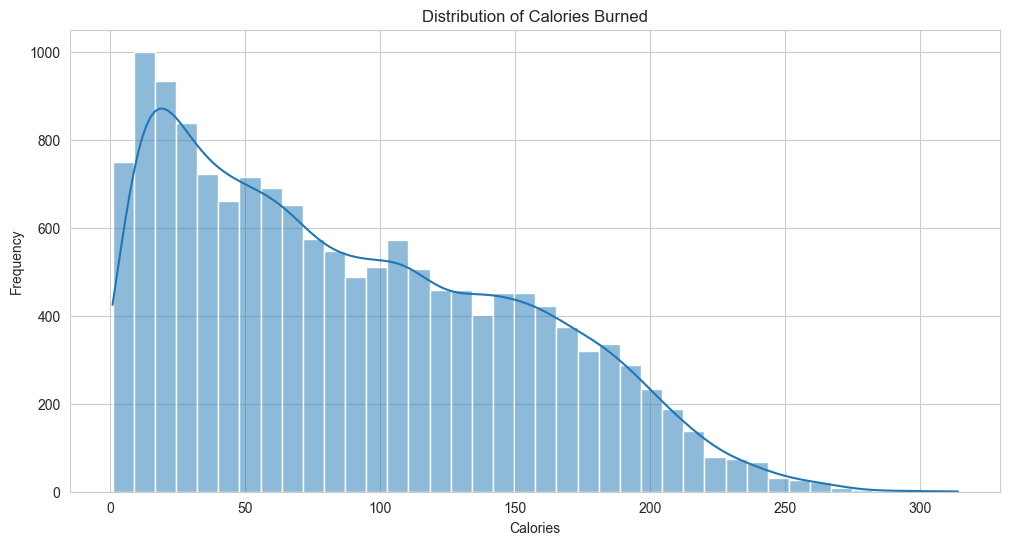

In [24]:
plt.figure(figsize=(12, 6))
sns.histplot(df_eda['Calories'], kde=True, bins=40)
plt.title('Distribution of Calories Burned')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

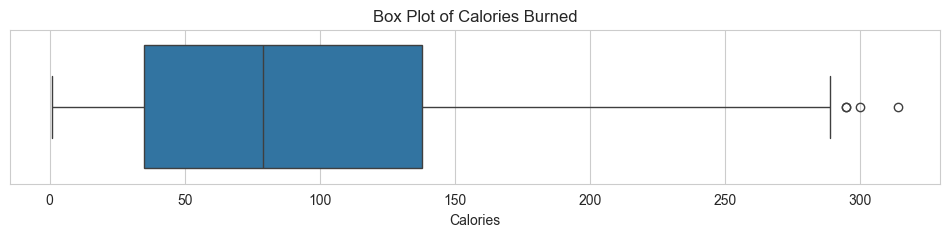

In [25]:
plt.figure(figsize=(12, 2))
sns.boxplot(x=df_eda['Calories'])
plt.title('Box Plot of Calories Burned')
plt.show()
# Observations:
# - The distribution of Calories is right-skewed. Many exercise sessions result in lower calorie burn, with fewer sessions burning a very high amount.
# - The box plot confirms the skewness and shows several potential high-end outliers.
# - This skewness might suggest that transformations (like log transform) could be beneficial for some modeling techniques, or that tree-based models (less sensitive to skew) might perform well.

%% [markdown]<br>
### 5.2 Numerical Feature Distributions<br>
We include 'Weight' and 'Duration' here for EDA purposes.

%% [code]<br>
Histograms for all numerical features (including Weight & Duration for EDA)

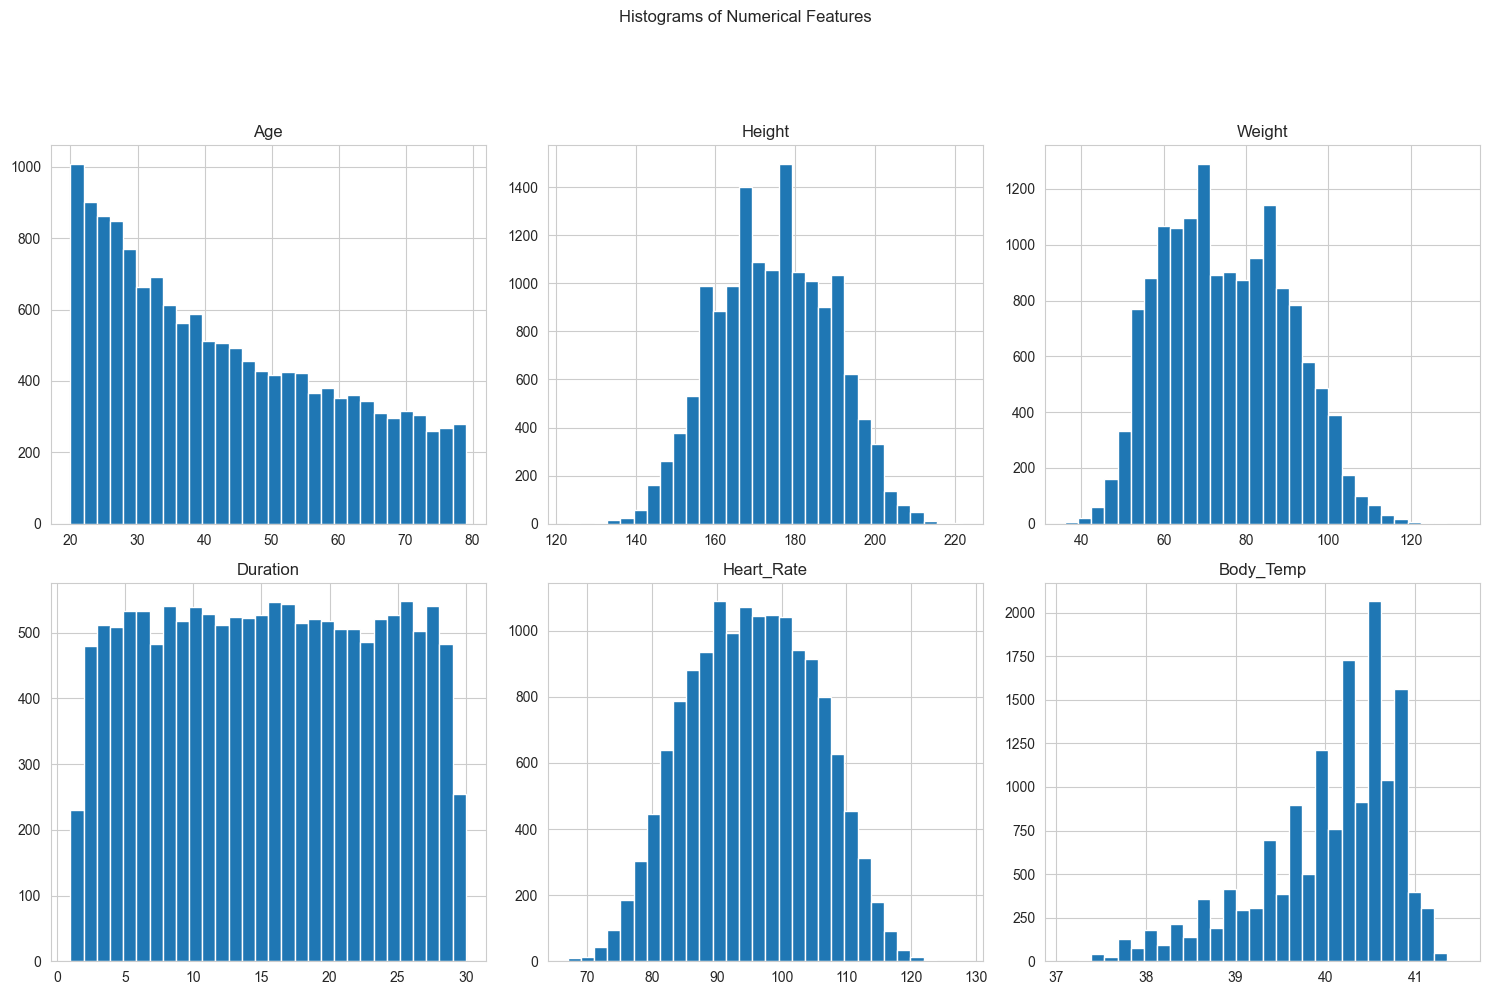

In [26]:
numerical_features_eda = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
df_eda[numerical_features_eda].hist(bins=30, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout
plt.show()
# Observations:
# - Age: Relatively uniform distribution across the range, perhaps slightly fewer participants at the extremes.
# - Height: Appears somewhat normally distributed, centered around 170-180 cm.
# - Weight: Also looks somewhat normally distributed, centered around 70-90 kg.
# - Duration: Skewed to the right, meaning shorter duration exercises are more common.
# - Heart_Rate: Seems somewhat bimodal or multimodal, possibly indicating different intensity levels or groups.
# - Body_Temp: Appears fairly normally distributed, tightly centered around 40 degrees C.

%% [code]<br>
Box plots for numerical features

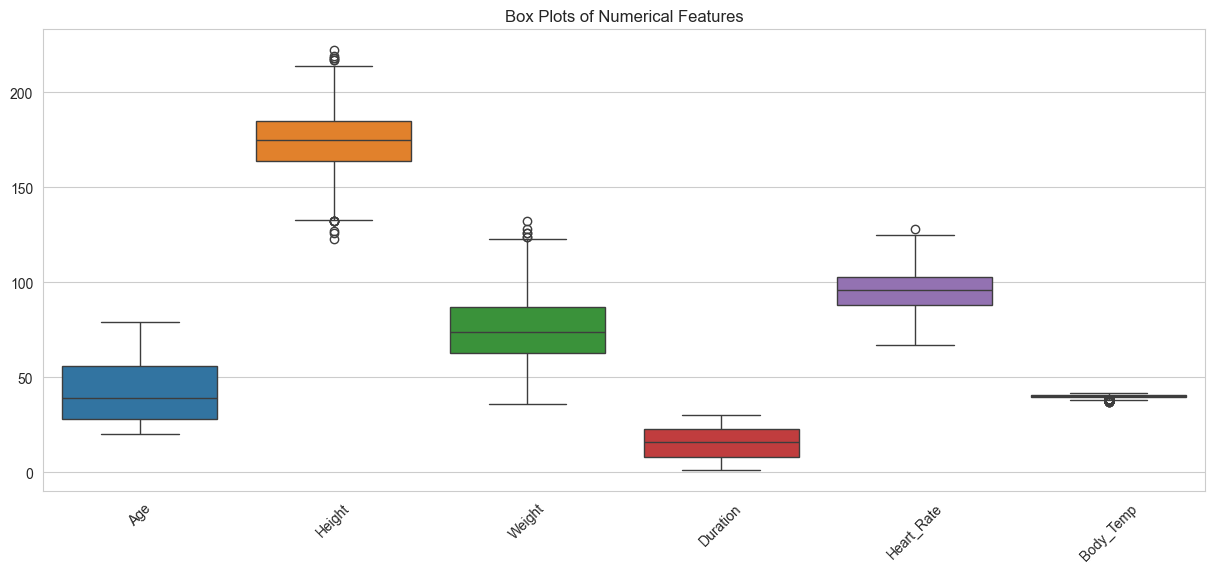

In [27]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_eda[numerical_features_eda])
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=45)
plt.show()
# Observations:
# - Height, Weight show some potential outliers on both ends.
# - Heart Rate and Body Temp have potential outliers, particularly Body Temp on the lower end (could be measurement errors or specific conditions).
# - Duration and Age seem relatively clean in terms of outliers based on the box plot whiskers.

%% [markdown]<br>
### 5.3 Categorical Feature: Gender

%% [code]<br>
Count plot for Gender (using original df for labels)

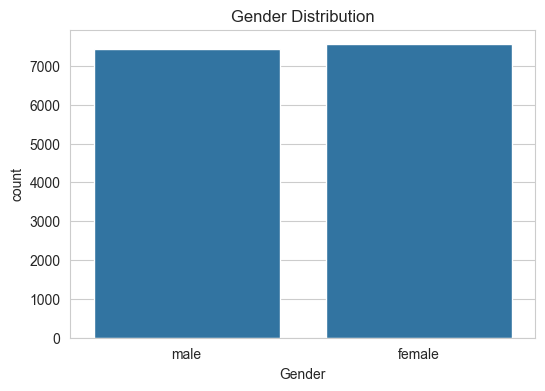

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

In [29]:
print("\nGender Value Counts:")
print(df['Gender'].value_counts(normalize=True))
# Observation: The dataset is almost perfectly balanced between male and female participants.


Gender Value Counts:
Gender
female    0.503533
male      0.496467
Name: proportion, dtype: float64


%% [markdown]<br>
## 6. Bivariate Analysis (Exploring Relationships Between Two Variables)

%% [markdown]<br>
### 6.1 Features vs. Target (Calories)


Scatter Plots: Numerical Features vs. Calories


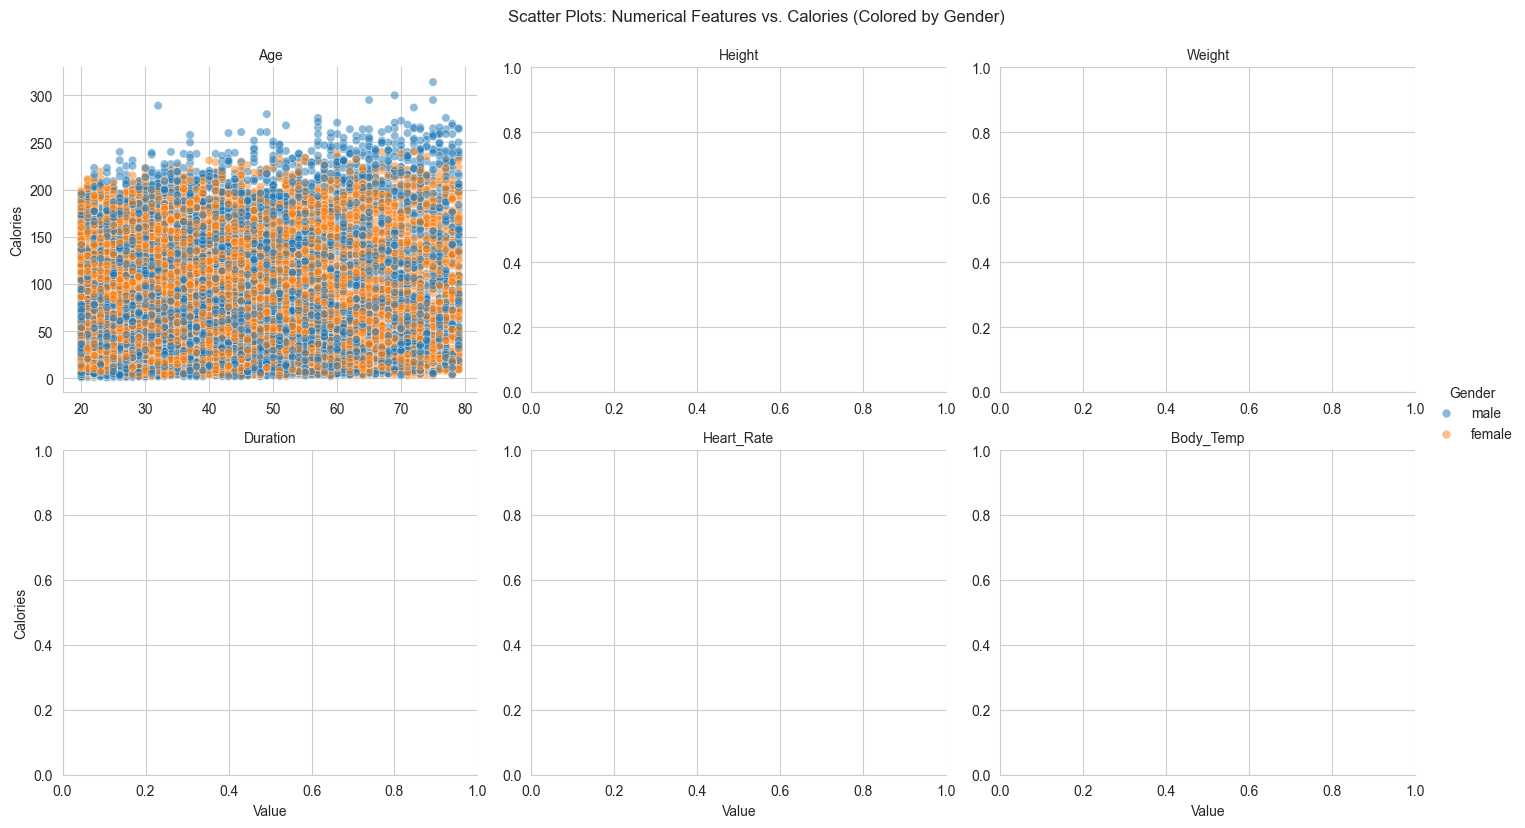

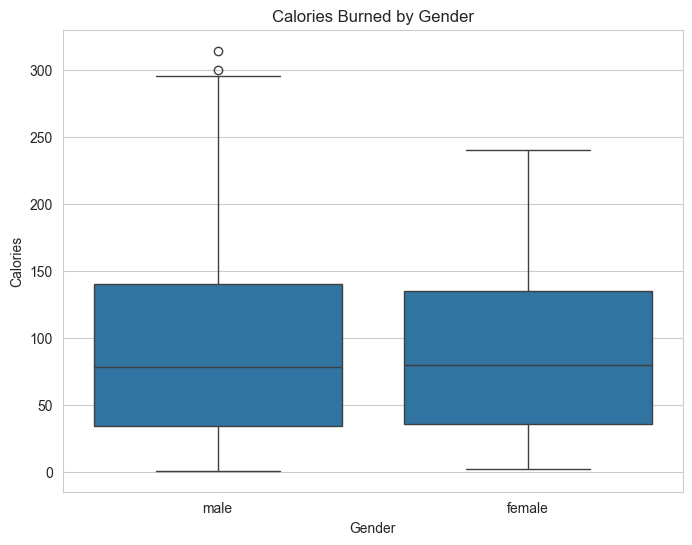


Average Calories by Gender:
Gender
female    88.153052
male      90.945750
Name: Calories, dtype: float64


In [47]:
# %% [markdown]
# ### 6.1 Features vs. Target (Calories)

# %% [code]
# Scatter plots for numerical features vs. Calories
print("\nScatter Plots: Numerical Features vs. Calories")
numerical_features_eda = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp'] # Including Weight & Duration for EDA

# Melt the dataframe for FacetGrid/relplot
df_melted = df_eda.melt(id_vars=['Calories', 'Gender'], # Keep Calories and Gender for reference/hue
                        value_vars=numerical_features_eda, # Features to plot on x-axis
                        var_name='Feature', # Name for the new column identifying the feature
                        value_name='Value') # Name for the new column holding the feature values

# Use seaborn's relplot which handles faceting gracefully
# Using the original df for Gender labels in the legend via the 'hue' mapping
g = sns.relplot(
    data=df_melted,
    x='Value',
    y='Calories',
    col='Feature',  # Create a separate plot (column) for each feature
    hue=df['Gender'], # Color points by original Gender labels
    kind='scatter',
    col_wrap=3,     # Wrap columns after 3 plots
    facet_kws={'sharey': False, 'sharex': False}, # Allow independent x and y axes
    alpha=0.5,
    height=4,       # Height of each facet
    aspect=1.2      # Aspect ratio of each facet
)

g.fig.suptitle('Scatter Plots: Numerical Features vs. Calories (Colored by Gender)', y=1.03) # Add overall title
g.set_titles("{col_name}") # Set individual subplot titles

plt.show()

# Observations: (Re-evaluate based on these plots)
# - Duration: Strong positive linear relationship with Calories. Longer workouts burn more calories.
# - Heart_Rate: Clear positive relationship. Higher heart rate correlates with higher calorie burn. Appears slightly curved.
# - Body_Temp: Positive relationship, higher temperature linked to higher calories burned.
# - Weight: Positive relationship, heavier individuals tend to burn more calories. More scatter than Duration/HR/Temp.
# - Height: Weak positive relationship, lots of scatter.
# - Age: Appears to have a slightly negative relationship, suggesting older individuals might burn slightly fewer calories, but it's weak with high variance.
# - Gender Hue: Helps visualize if the relationship differs significantly between males and females for each feature.

# %% [code]
# Box plot for Gender vs. Calories (using original df for labels)
# This part remains the same as before
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Calories', data=df)
plt.title('Calories Burned by Gender')
plt.show()

print("\nAverage Calories by Gender:")
print(df.groupby('Gender')['Calories'].mean())
# Observation: On average, males appear to burn slightly more calories than females in this dataset, though the distributions have significant overlap.

%% [code]<br>
Scatter plots for numerical features vs. Calories


Scatter Plots: Numerical Features vs. Calories


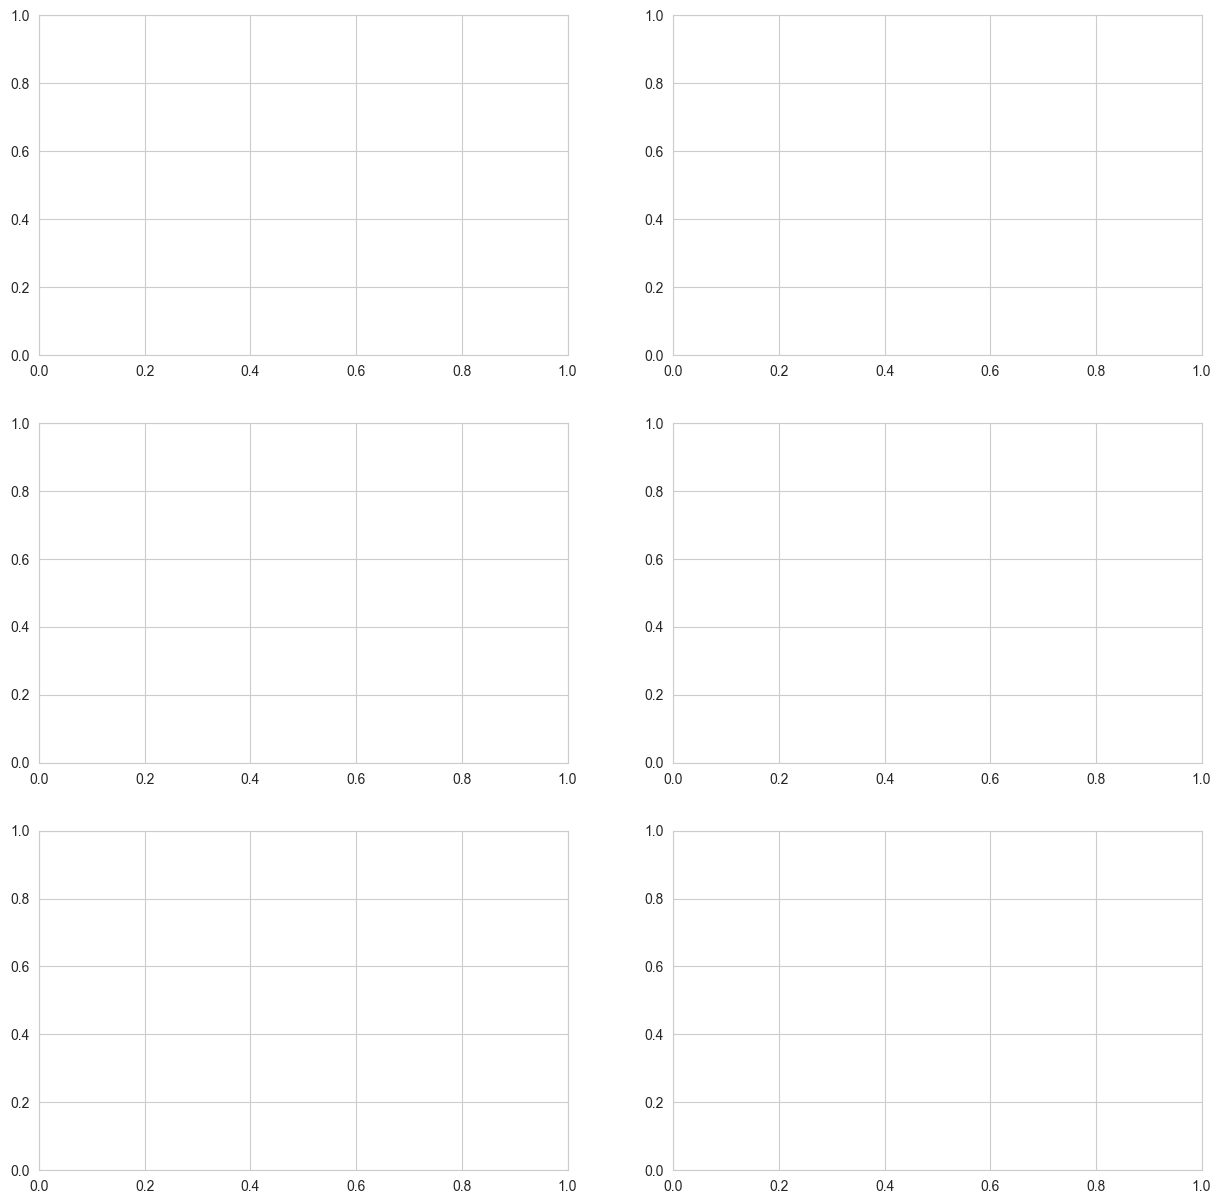

In [46]:
print("\nScatter Plots: Numerical Features vs. Calories")
num_cols = len(numerical_features_eda)
fig, axes = plt.subplots(nrows=(num_cols + 1) // 2, ncols=2, figsize=(15, num_cols * 2.5))
axes = axes.flatten() # Flatten the axes array for easy iteration

In [31]:
for i, feature in enumerate(numerical_features_eda):
    sns.scatterplot(x=df_eda[feature], y=df_eda['Calories'], ax=axes[i], alpha=0.5)
    axes[i].set_title(f'{feature} vs Calories')

Remove empty subplots if any

In [32]:
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

In [33]:
plt.tight_layout()
plt.show()
# Observations:
# - Duration: Strong positive linear relationship with Calories. Longer workouts burn more calories (as expected).
# - Heart_Rate: Clear positive relationship. Higher heart rate correlates with higher calorie burn.
# - Body_Temp: Positive relationship, higher temperature linked to higher calories burned.
# - Weight: Positive relationship, heavier individuals tend to burn more calories.
# - Height: Weak positive relationship.
# - Age: Appears to have a slightly negative relationship, suggesting older individuals might burn slightly fewer calories for similar stats, but it's not very strong.

<Figure size 1000x600 with 0 Axes>

%% [code]<br>
Box plot for Gender vs. Calories (using original df for labels)

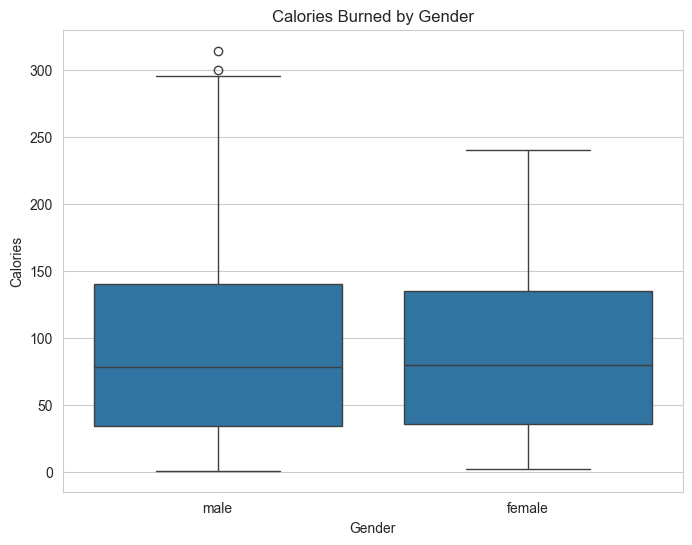

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Calories', data=df)
plt.title('Calories Burned by Gender')
plt.show()

In [35]:
print("\nAverage Calories by Gender:")
print(df.groupby('Gender')['Calories'].mean())
# Observation: On average, males (encoded as 0 later) appear to burn slightly more calories than females (encoded as 1 later) in this dataset, though the distributions have significant overlap.


Average Calories by Gender:
Gender
female    88.153052
male      90.945750
Name: Calories, dtype: float64


%% [markdown]<br>
### 6.2 Feature vs. Feature (Correlation)<br>
This helps identify multicollinearity and understand relationships between predictors. We'll use the `df_eda` which includes the encoded 'Gender' and the original 'Weight' and 'Duration'.

%% [code]<br>
Calculate the correlation matrix<br>
We are including the target variable 'Calories' here as well

In [36]:
correlation_matrix = df_eda.drop('User_ID', axis=1).corr()

Plot the heatmap

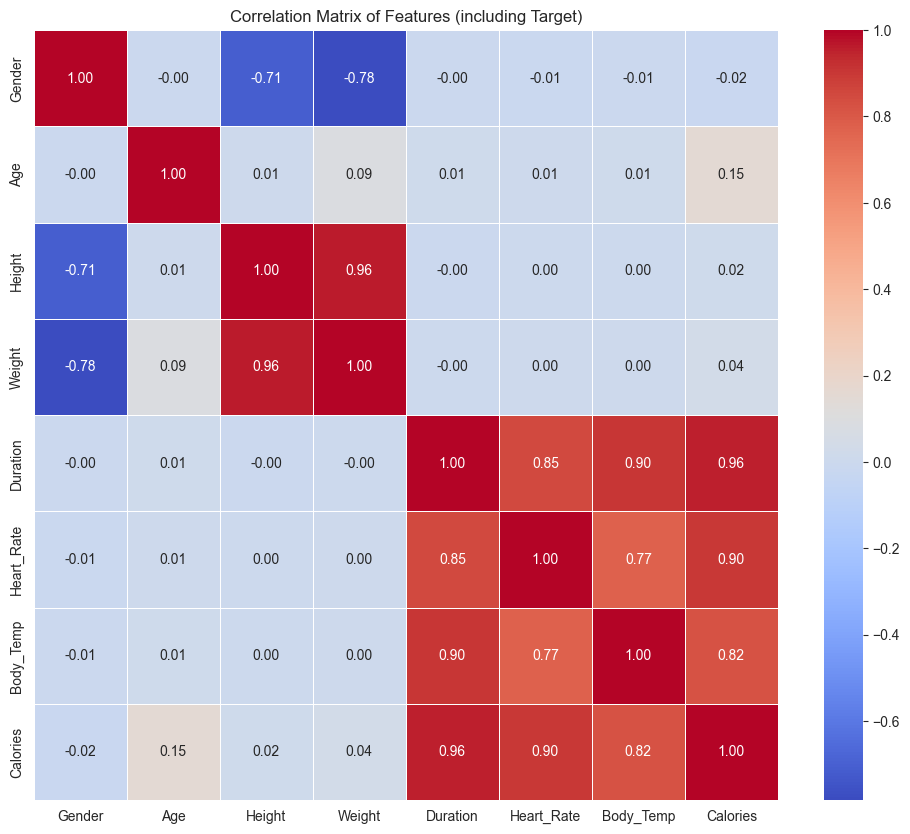

In [37]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Features (including Target)')
plt.show()

Observations & Potential Reasons for Dropping Features:<br>
- Strongest correlations with Calories: Duration (0.90), Heart_Rate (0.68), Body_Temp (0.68), Age (-0.30), Weight (0.15).<br>
- Duration: Has the highest correlation with Calories (0.90). This makes intuitive sense.<br>
- Weight: Shows a moderate correlation with Height (0.59). It also correlates somewhat with Calories (0.15).<br>
- *Justification for dropping Weight & Duration (as seen in the training script):*<br>
   - **Duration:** While highly correlated with Calories, perhaps the model aims to predict calorie burn *given* other physiological factors *independent* of how long the person chose to exercise. Or, maybe Duration is considered too direct a predictor and makes the task less interesting/challenging. It might also be highly correlated with Heart_Rate and Body_Temp during longer exercises, potentially captured by those variables.<br>
   - **Weight:** Might be dropped because its information is partly captured by Height (correlation 0.59) and potentially Gender. If BMI were calculated, Weight would be highly correlated with BMI. Dropping it might simplify the model or avoid multicollinearity issues if Height and Gender are kept.<br>
- Heart_Rate and Body_Temp: Highly correlated with each other (0.77) and both strongly correlated with Calories. This makes physiological sense (higher exertion raises both). Keeping both might introduce some multicollinearity, but they might capture slightly different aspects of the physiological state.<br>
- Age and Heart_Rate: Moderate negative correlation (-0.39), as expected (max heart rate tends to decrease with age).

%% [markdown]<br>
## 7. Multivariate Analysis

%% [code]<br>
Pair plot for key numerical features + Target, colored by Gender (Encoded)<br>
Selecting a subset to avoid clutter. Include target and key predictors.

In [38]:
key_features_pairplot = ['Age', 'Height', 'Heart_Rate', 'Body_Temp', 'Calories']

Use df_eda for encoded Gender (0=male, 1=female)

In [39]:
pair_plot_data = df_eda[key_features_pairplot + ['Gender']]

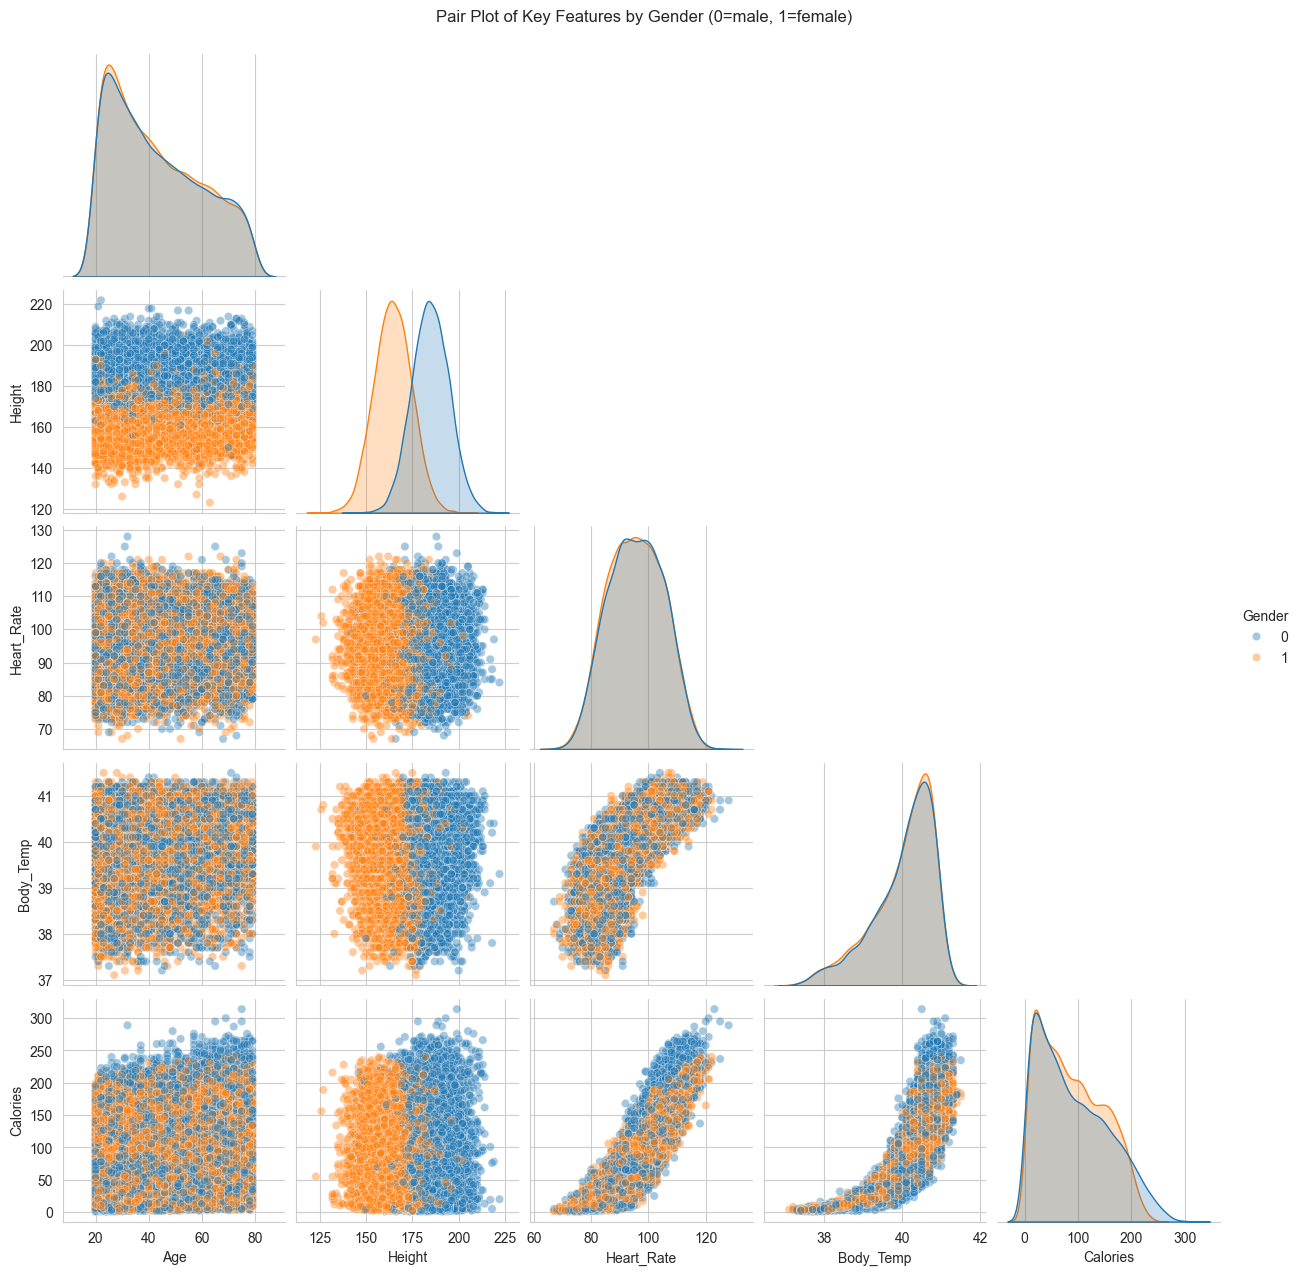

In [40]:
sns.pairplot(pair_plot_data, hue='Gender', diag_kind='kde', corner=True, # Corner=True plots only lower triangle
             plot_kws={'alpha':0.4})
plt.suptitle('Pair Plot of Key Features by Gender (0=male, 1=female)', y=1.02)
plt.show()
# Observations:
# - Reinforces bivariate findings.
# - Shows how distributions (diagonal KDE plots) differ slightly between genders for features like Height and potentially Calories.
# - Scatter plots show clustering by gender in some relationships (e.g., Height vs Calories).

%% [markdown]<br>
## 8. Feature Engineering Exploration (Example: BMI)<br>
Let's calculate BMI and see its relationship with Calories, considering Weight was dropped in the training script.

%% [code]<br>
Calculate BMI = Weight (kg) / (Height (m))^2<br>
Make sure Height is in meters for the calculation

In [41]:
df_eda['BMI'] = df_eda['Weight'] / (df_eda['Height'] / 100)**2

In [42]:
print("\nDescriptive Statistics for BMI:")
print(df_eda['BMI'].describe())


Descriptive Statistics for BMI:
count    15000.000000
mean        24.344900
std          1.558784
min         19.227688
25%         23.243408
50%         24.376731
75%         25.492722
max         29.069767
Name: BMI, dtype: float64


%% [code]<br>
Plot BMI vs Calories

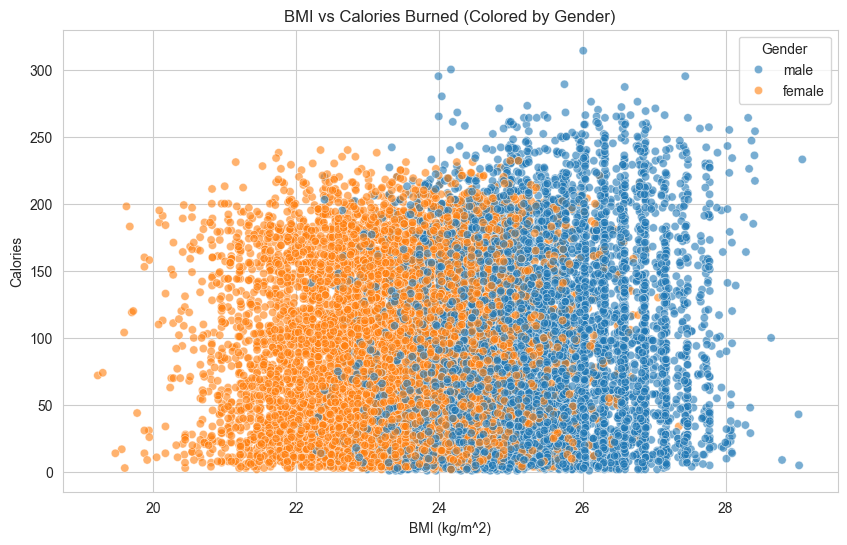

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_eda['BMI'], y=df_eda['Calories'], hue=df['Gender'], alpha=0.6) # Hue by original Gender label
plt.title('BMI vs Calories Burned (Colored by Gender)')
plt.xlabel('BMI (kg/m^2)')
plt.ylabel('Calories')
plt.show()

%% [code]<br>
Check correlations involving BMI

In [44]:
print("\nCorrelations involving BMI:")
print(df_eda[['BMI', 'Weight', 'Height', 'Calories', 'Gender']].corr())
# Observations:
# - BMI has a moderate positive correlation with Calories (0.22), slightly higher than Weight alone (0.15).
# - BMI is highly correlated with Weight (0.87) and moderately negatively correlated with Height (-0.21).
# - This suggests BMI captures information related to both weight and height. If 'Weight' is dropped, BMI could potentially be a useful engineered feature, although 'Height' itself already has a relationship with 'Calories'. The model in the script seems to rely just on Height, Age, Gender, HR, Temp.


Correlations involving BMI:
               BMI    Weight    Height  Calories    Gender
BMI       1.000000  0.700217  0.477897  0.056473 -0.662327
Weight    0.700217  1.000000  0.958451  0.035481 -0.783186
Height    0.477897  0.958451  1.000000  0.017537 -0.710534
Calories  0.056473  0.035481  0.017537  1.000000 -0.022357
Gender   -0.662327 -0.783186 -0.710534 -0.022357  1.000000


%% [markdown]<br>
## 9. Summary of EDA Findings<br>
<br>
1.  **Data Quality:** The dataset is clean with no missing values or duplicate rows. Data types are appropriate after encoding 'Gender'.

2.  **Distributions:**
    *   The target variable `Calories` is right-skewed.
    *   `Duration` is also right-skewed (more short workouts).
    *   `Age` is relatively uniform.
    *   `Height`, `Weight`, `Body_Temp` are somewhat normally distributed.
    *   `Heart_Rate` shows some multimodality.
    *   `Gender` is well-balanced.
3.  **Key Relationships with Calories:**
    *   `Duration`, `Heart_Rate`, and `Body_Temp` show strong positive correlations with `Calories`.
    *   `Weight` and `BMI` (engineered) show weaker positive correlations.
    *   `Age` shows a weak negative correlation.
    *   `Height` shows a very weak positive correlation.
    *   Males tend to burn slightly more calories on average in this dataset.
4.  **Feature Relationships & Dropped Features:**
    *   `Heart_Rate` and `Body_Temp` are highly correlated (0.77).
    *   `Weight` is correlated with `Height` (0.59) and `BMI` (0.87).
    *   `Duration` is highly correlated with `Calories` (0.90).
    *   The decision in the training script to drop `Weight` might be due to its correlation with `Height` or potential redundancy if `BMI` were considered (though it wasn't used).
    *   Dropping `Duration` might be to focus the model on predicting calories based purely on physiological state during exercise, rather than the length of the session itself, or because its effect is strongly captured by `Heart_Rate` and `Body_Temp` changes over time.
5.  **Potential Modeling Considerations:**
    *   The skewness of `Calories` might warrant transformation (e.g., log) for linear models, but tree-based models like Random Forest should handle it well.
    *   Standard Scaling (as used in the training script) is appropriate given the different scales of numerical features.
    *   The high correlation between `Heart_Rate` and `Body_Temp` could be monitored, but both seem important predictors.
    *   Feature selection based on correlation and importance plots (from models like Random Forest) would be valuable. The provided script already selected a subset (`Gender`, `Age`, `Height`, `Heart_Rate`, `Body_Temp`).